In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%%bash
cd /content/drive/MyDrive
git clone https://github.com/WongKinYiu/yolov7.git
cd yolov7
wget https://raw.githubusercontent.com/WongKinYiu/yolov7/u5/requirements.txt
pip install -r requirements.txt

In [ ]:
%%bash
wget -P /content/drive/MyDrive/yolov7/weights https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
wget -P /content/drive/MyDrive/yolov7/weights https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7x.pt
wget -P /content/drive/MyDrive/yolov7/weights https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6.pt
wget -P /content/drive/MyDrive/yolov7/weights https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6.pt
wget -P /content/drive/MyDrive/yolov7/weights https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-d6.pt
wget -P /content/drive/MyDrive/yolov7/weights https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6e.pt

In [ ]:
# Giải nén dữ liệu đê train model
%cd /content/gdrive/MyDrive/yolov7
!mkdir train_data
%cd train_data
!unzip ../data.zip

In [ ]:
# Tổ chức lại thư mục train. Lý do: Vì YOLOv7 yêu cầu
# train
#   - images
#   - labels
# test
#   - images
#   - labels

%cd /content/drive/MyDrive/yolov7/train_data/datatest
!mkdir train
!mkdir train/images
!mkdir train/labels
!mv *.png train/images
!mv *.txt train/labels

In [ ]:
%cd /content/drive/MyDrive/yolov7
!rm data/mydataset.yaml # nếu có
!echo 'train: ./train_data/datatest/train' >> data/mydataset.yaml
!echo 'val: ./train_data/datatest/train' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo "names: ['facture']" >> data/mydataset.yaml

/content/drive/MyDrive/yolov7


In [ ]:
# Train model YOLOv7 với dữ liệu 
%cd /content/drive/MyDrive/yolov7
!python train.py --batch 8 --cfg cfg/training/yolov7-tiny.yaml --epochs 1200 --data data/mydataset.yaml --weights 'yolov7.pt'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
                 all         102         109      0.0296      0.0917      0.0114     0.00236

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
  201/1199     1.66G   0.06153  0.007653         0   0.06919        15       640: 100% 13/13 [00:04<00:00,  2.69it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 7/7 [00:01<00:00,  3.83it/s]
                 all         102         109      0.0404       0.183       0.033      0.0063

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
  202/1199     1.66G   0.05593   0.00725         0   0.06318        11       640: 100% 13/13 [00:04<00:00,  3.00it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 7/7 [00:01<00:00,  4.45it/s]
                 all         102         109      0.0412       0.211      0.0334      0.0065

     Ep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Nhận diện thử  với weights vừa train sau 1200 epochs
%cd /content/drive/MyDrive/yolov7
!python detect.py --weights /content/drive/MyDrive/yolov7/runs/train/exp10/weights/best.pt --source test/forearm_patient09088_image2_hori.png

/content/drive/MyDrive/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='test/forearm_patient09088_image2_hori.png', update=False, view_img=False, weights=['/content/drive/MyDrive/yolov7/runs/train/exp10/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6007596 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 facture, Done. (7

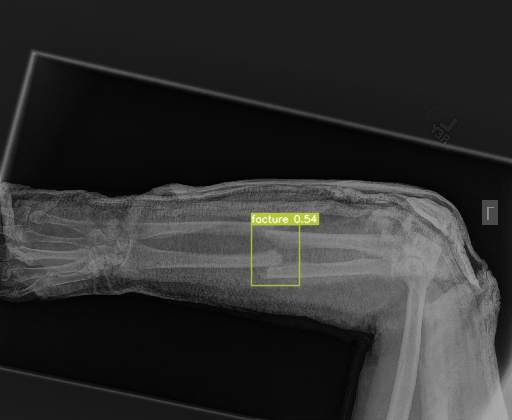

In [ ]:
# Xem ảnh đã nhận diện
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/yolov7/runs/detect/exp6/forearm_patient09088_image2_hori.png"))

In [ ]:
%cd /content/drive/MyDrive/yolov7
!python detect.py --weights /content/drive/MyDrive/yolov7/runs/train/exp10/weights/best.pt --source /content/drive/MyDrive/yolov7/test/humerus_patient02837_image1.png

/content/drive/MyDrive/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/yolov7/test/humerus_patient02837_image1.png', update=False, view_img=False, weights=['/content/drive/MyDrive/yolov7/runs/train/exp10/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6007596 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-def

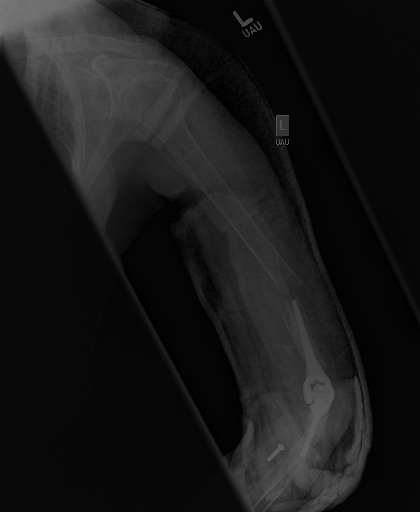

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/yolov7/runs/detect/exp8/humerus_patient02837_image1.png"))